In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

#from xgboost import XGBClassifier

#from vecstack import stacking

from sklearn.model_selection import GridSearchCV

In [25]:
df=pd.read_csv("03_Movie_Classification.csv")

In [26]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [27]:
df.shape

(506, 19)

In [28]:
df.dtypes

Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
3D_available            object
Time_taken             float64
Twitter_hastags        float64
Genre                   object
Avg_age_actors           int64
Num_multiplex            int64
Collection               int64
Start_Tech_Oscar         int64
dtype: object

In [29]:
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [30]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [32]:
df.nunique()

Marketing expense      504
Production expense      76
Multiplex coverage      81
Budget                 446
Movie_length           356
Lead_ Actor_Rating     339
Lead_Actress_rating    354
Director_rating        339
Producer_rating        353
Critic_rating           74
Trailer_views          504
3D_available             2
Time_taken             449
Twitter_hastags        423
Genre                    4
Avg_age_actors          42
Num_multiplex          293
Collection             228
Start_Tech_Oscar         2
dtype: int64

In [33]:
df.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Genre',
       'Avg_age_actors', 'Num_multiplex', 'Collection', 'Start_Tech_Oscar'],
      dtype='object')

In [34]:
y=df['Start_Tech_Oscar']
X=df.drop(['Start_Tech_Oscar'],axis=1)

In [35]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [36]:
y.head(15)

0     1
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     1
9     1
10    0
11    0
12    0
13    1
14    1
Name: Start_Tech_Oscar, dtype: int64

In [55]:
y.value_counts()

1    276
0    230
Name: Start_Tech_Oscar, dtype: int64

In [37]:
df.nunique()

Marketing expense      504
Production expense      76
Multiplex coverage      81
Budget                 446
Movie_length           356
Lead_ Actor_Rating     339
Lead_Actress_rating    354
Director_rating        339
Producer_rating        353
Critic_rating           74
Trailer_views          504
3D_available             2
Time_taken             449
Twitter_hastags        423
Genre                    4
Avg_age_actors          42
Num_multiplex          293
Collection             228
Start_Tech_Oscar         2
dtype: int64

In [38]:
num_cols = X.drop(['Genre','3D_available'],axis=1)
cat_cols= X[['Genre','3D_available']]

In [39]:
num_cols=num_cols.columns

In [40]:
cat_cols=cat_cols.columns

In [41]:
X[cat_cols] = X[cat_cols].astype('category')

In [42]:
y=y.astype('category')

In [43]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [46]:
numeric_transformer = Pipeline(steps=[('missing_value',SimpleImputer(strategy='mean')),
                     ('scalar1',StandardScaler())])

In [47]:
categorical_transformer = Pipeline(steps=[('missing_value1',SimpleImputer(strategy='most_frequent')),
                                     ('onehotencode',OneHotEncoder(handle_unknown='ignore') )])

In [48]:
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer, num_cols),('cat',categorical_transformer,cat_cols)])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
RF_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

In [51]:
RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('missing_value',
                                                                   SimpleImputer()),
                                                                  ('scalar1',
                                                                   StandardScaler())]),
                                                  Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       'Collection'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('missing_value1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Genre', '3D_available'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [52]:
train_pred_RFPipe = RF_pipe.predict(X_train)
test_pred_RFPipe = RF_pipe.predict(X_test)

In [53]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred, average='weighted'))
    print("Precision: ", precision_score(act, pred, average='weighted'))  

In [54]:
print("--Train--")
evaluate_model(y_train, train_pred_RFPipe)
print("--Test--")
evaluate_model(y_test, test_pred_RFPipe)

--Train--
Confusion Matrix 
 [[167   0]
 [  0 187]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[34 29]
 [33 56]]
Accurcay :  0.5921052631578947
Recall   :  0.5921052631578947
Precision:  0.5960884432327527


In [56]:
param_grid={'classifier__max_depth':[2,3,4,5,6,7,8,9]}

grid_search=GridSearchCV(RF_pipe,param_grid,cv=10)
grid_search


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('missing_value',
                                                                                          SimpleImputer()),
                                                                                         ('scalar1',
                                                                                          StandardScaler())]),
                                                                         Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', '...
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       'Collection'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('missing_value1',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencode',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Genre', '3D_available'], dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [57]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'classifier__max_depth': 4}


In [59]:
grid_search.cv_results_

{'mean_fit_time': array([0.02250164, 0.01718655, 0.01935489, 0.01757419, 0.01555889,
        0.02144463, 0.0188365 , 0.01802938]),
 'std_fit_time': array([0.01062108, 0.00468726, 0.00700436, 0.00325975, 0.00307444,
        0.00847384, 0.00447453, 0.00743696]),
 'mean_score_time': array([0.0084481 , 0.00624912, 0.00795376, 0.00715373, 0.00658581,
        0.00428412, 0.00807948, 0.00883813]),
 'std_score_time': array([0.00715788, 0.00765358, 0.00687593, 0.00548741, 0.0065944 ,
        0.00617705, 0.00608442, 0.00760988]),
 'param_classifier__max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'classifier__max_depth': 2},
  {'classifier__max_depth': 3},
  {'classifier__max_depth': 4},
  {'classifier__max_depth': 5},
  {'classifier__max_depth': 6},
  {'classifier__max_depth': 7},
  {'classifier__max_depth': 8},
  {'classifier__max_depth': 9}],
 '

In [ ]:
grid_search.

In [65]:
from sklearn import tree
import matplotlib.pyplot as plt

[]

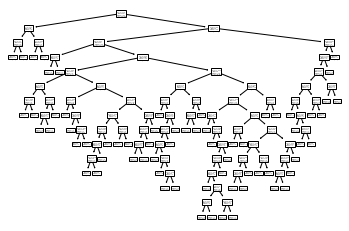

In [66]:
tree.plot_tree(RF_pipe['classifier'])
plt.plot()

In [67]:
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,classifier__max_depth,Accuracy
0,2,0.565159
1,3,0.565238
2,4,0.575952
3,5,0.562302
4,6,0.570952
5,7,0.548095
6,8,0.548333
7,9,0.567778


In [68]:
# Ploting the top 10 features

importances = grid_search.best_estimator_.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1])[0:10], importances[indices][0:10])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1])[0:10], names[0:10], rotation =0)

# Show plot
plt.show()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [73]:
importances=grid_search.best_estimator_['classifier'].feature_importances_

In [75]:
importances

array([0.17359078, 0.        , 0.        , 0.20067506, 0.03122291,
       0.04503305, 0.        , 0.        , 0.14848816, 0.        ,
       0.06812272, 0.        , 0.04323172, 0.        , 0.        ,
       0.2896356 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [78]:
indices = np.argsort(importances)[::-1]

In [79]:
indices

array([15,  3,  0,  8, 10,  5, 12,  4, 16,  7,  1,  2, 19,  6, 18, 17,  9,
       20, 11, 13, 14, 21], dtype=int64)

In [77]:
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1])[0:10], importances[indices][0:10])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1])[0:10], names[0:10], rotation =0)

# Show plot
plt.show()

IndexError: index 18 is out of bounds for axis 0 with size 18